In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [118]:
df = pd.read_csv('2016 Data/june.csv')
print(df.columns)
print(len(df))

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'total_amount'],
      dtype='object')
245896


In [119]:
day = '01'
s = 0
dict = {}
for i in range (1,32):
    if i <10 :
        day = str(0)+str(i)
    else:
        day = str(i)
    value = len(df.loc[(df['tpep_pickup_datetime']>=day+'-06-2016 00:00') & (df['tpep_pickup_datetime']<=day+'-06-2016 24:00')])
    print(value)
    dict[i] =value
    s+=value
print(s)

8601
8708
8537
4981
7757
10239
8354
8410
9460
9260
5106
7960
9436
8770
8766
8840
9289
4821
7841
9039
7553
8463
8647
9155
5320
8124
9623
7604
8843
8389
0
245896


In [120]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
six5 = combined.loc[(combined['DateRunFor'] == '06-06-2016') & (combined['pool_window'] == 5)]
eighteen5 = combined.loc[(combined['DateRunFor'] == '18-06-2016') & (combined['pool_window'] == 5)]
twentynine5 = combined.loc[(combined['DateRunFor'] == '29-06-2016') & (combined['pool_window'] == 5)]

print(six5['dist_saved'].sum())
print(eighteen5['dist_saved'].sum())
print(twentynine5['dist_saved'].sum())
train_x = np.array([dict[6],dict[18],dict[29]])
train_y = np.array([six5['dist_saved'].sum(),eighteen5['dist_saved'].sum(),twentynine5['dist_saved'].sum()])
test_x = []
for i in dict.items():
    if i[0]!= 6 and i[0]!=18 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

32009.240459999997
13436.14376
26787.119039999998
28


In [121]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[3.40388922]


In [122]:
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)

[26233.29759454 26597.51374139 26015.44868427 13911.21860745
 23360.41509036 25392.53695647 25583.15475295 29157.23843705
 28476.46059246 14336.70476032 24051.40460262 29075.5450957
 26808.55487321 26794.93931632 27046.82711882 28575.17337993
 23646.34178509 27724.20107419 22666.02168888 25763.56088177
 26389.87649879 28119.05222405 15065.13705403 24609.64243519
 29712.07238039 22839.62003925 25511.67307927 -3043.55361207]


In [123]:
predicted= list(predicted)
predicted.insert(5,six5['dist_saved'].sum()) 
predicted.insert(17,eighteen5['dist_saved'].sum()) 
predicted.insert(28,twentynine5['dist_saved'].sum())


In [124]:

predicted = predicted[:-1]
june_5_min_sum = sum(predicted)
june_5_min_avg = june_5_min_sum/(len(predicted))
x_axis = []
for i in range(1,31):
    x_axis.append(i)

print(len(predicted))

30


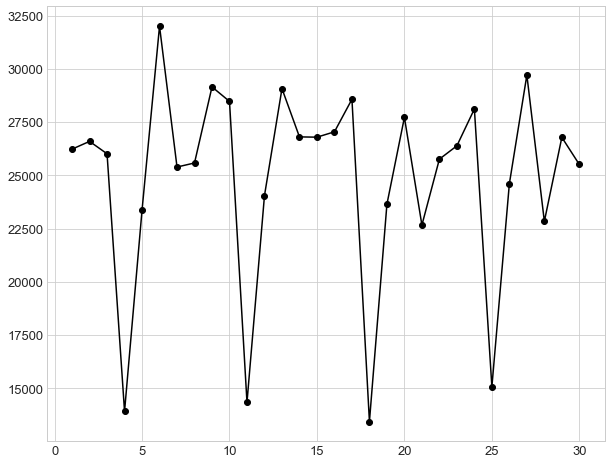

In [125]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
plt.plot(x_axis, predicted, '-ok', color='black')

In [126]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
six10 = combined.loc[(combined['DateRunFor'] == '06-06-2016') & (combined['pool_window'] == 10)]
eighteen10 = combined.loc[(combined['DateRunFor'] == '18-06-2016') & (combined['pool_window'] == 10)]
twentynine10 = combined.loc[(combined['DateRunFor'] == '29-06-2016') & (combined['pool_window'] == 10)]

print(six10['dist_saved'].sum())
print(eighteen10['dist_saved'].sum())
print(twentynine10['dist_saved'].sum())
train_x = np.array([dict[6],dict[18],dict[29]])
train_y = np.array([six10['dist_saved'].sum(),eighteen10['dist_saved'].sum(),twentynine10['dist_saved'].sum()])
test_x = []
for i in dict.items():
    if i[0]!= 6 and i[0]!=18 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

33877.0936
14778.67624
28485.01668
28


In [127]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[3.49893391]


In [128]:
predicted2 = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted2)

[27929.5869812  28303.97290927 27705.65521114 15263.44623728
 24976.48676356 27065.35030613 27261.29060493 30935.17120746
 30235.38442602 15700.81297567 25686.77034671 30851.19679368
 28520.90681151 28506.91107588 28765.83218501 30336.85350933
 25270.39721176 29462.12003254 24262.7042465  27446.73410201
 28090.53794093 29867.99636577 16449.5848318  26260.59550749
 31505.49743432 24441.14987576 27187.81299288 -2164.7435543 ]


In [129]:
predicted2= list(predicted2)
predicted2.insert(5,six10['dist_saved'].sum()) 
predicted2.insert(17,eighteen10['dist_saved'].sum()) 
predicted2.insert(28,twentynine10['dist_saved'].sum())


In [130]:
predicted2 = predicted2[:-1]
june_10_min_sum = sum(predicted2)
june_10_min_avg = june_10_min_sum/(len(predicted2))
x_axis = []
for i in range(1,31):
    x_axis.append('day'+str(i))

print(len(predicted2))

30


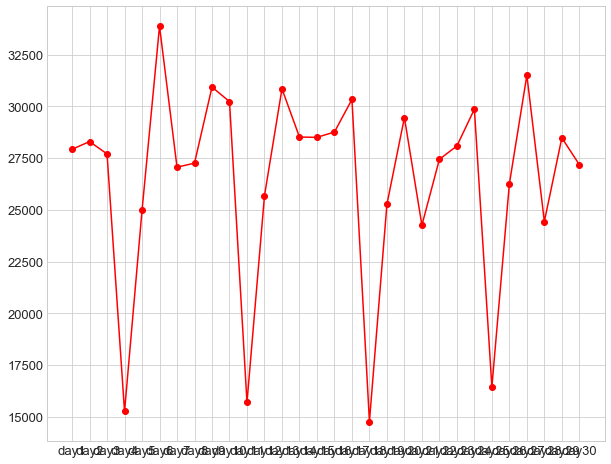

In [131]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
plt.plot(x_axis, predicted2, '-ok', color='red')

In [132]:
print(len(x_axis),len(predicted),len(predicted2))

30 30 30


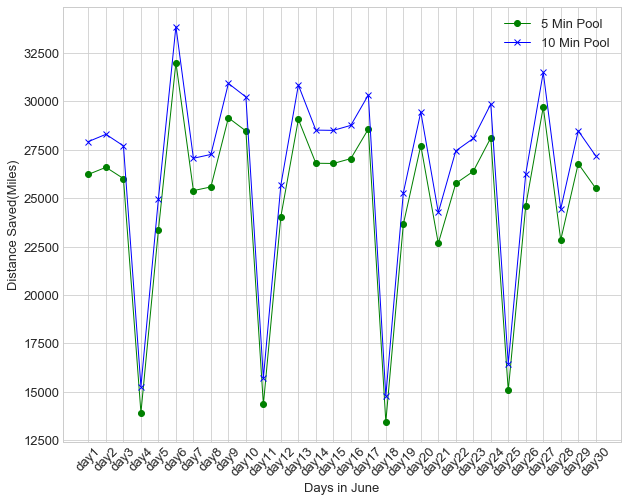

In [133]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': x_axis, '5 Min Pool': predicted, '10 Min Pool': predicted2})
 
# multiple line plot
matplotlib.rcParams.update({'font.size': 13})
fig = plt.figure(figsize=(10,8))
plt.plot( 'x', '5 Min Pool', data=df, marker='o', color='green', linewidth=1)
plt.plot( 'x', '10 Min Pool', data=df, marker='x', color='blue', linewidth=1)
plt.xlabel("Days in June")
plt.ylabel("Distance Saved(Miles)")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Days_June.png')

In [134]:
for i in range(len(predicted)):
    print(predicted2[i],predicted[i],(predicted2[i]-predicted[i])/predicted[i]*100)

27929.58698120279 26233.297594535965 6.466169114096192
28303.972909269156 26597.51374139178 6.415859709555248
27705.6552111444 26015.448684267067 6.496933984842211
15263.446237275246 13911.218607451428 9.720411043641484
24976.486763557805 23360.415090364877 6.917992111619134
33877.0936 32009.240459999997 5.835356019566118
27065.3503061337 25392.536956466938 6.587814965218477
27261.290604934788 25583.154752952225 6.559534460029447
30935.171207455205 29157.238437051332 6.097740615052827
30235.38442602275 28476.460592461026 6.176764236027941
15700.812975670535 14336.704760320372 9.514796029877093
25686.77034671175 24051.404602624036 6.799460451924267
30851.19679368331 29075.545095700494 6.107028061342821
28520.906811513218 26808.554873214776 6.387333992438745
28506.911075884567 26794.93931632297 6.389160801415578
28765.83218501458 27046.82711882138 6.355662564933455
30336.853509330453 28575.17337992662 6.165072407369443
14778.67624 13436.14376 9.99194786823269
25270.39721175944 23646.3417

In [135]:
df = pd.read_csv('2016 Data/may.csv')
day = '01'
s = 0
dict = {}
for i in range (1,32):
    if i <10 :
        day = str(0)+str(i)
    else:
        day = str(i)
    value = len(df.loc[(df['tpep_pickup_datetime']>=day+'-05-2016 00:00') & (df['tpep_pickup_datetime']<=day+'-05-2016 24:00')])
    print(value)
    dict[i] =value
    s+=value
print(s)

7947
9602
8256
8778
9342
9115
5292
7812
9902
8741
8998
9558
9346
5567
8843
9881
10059
9895
9921
9423
5461
8739
9490
8490
8893
9054
8378
4652
5623
8327
8681
262066


In [136]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A = combined.loc[(combined['DateRunFor'] == '17-05-2016') & (combined['pool_window'] == 5)]
B = combined.loc[(combined['DateRunFor'] == '28-05-2016') & (combined['pool_window'] == 5)]
C = combined.loc[(combined['DateRunFor'] == '24-05-2016') & (combined['pool_window'] == 5)]

print(A['dist_saved'].sum())
print(B['dist_saved'].sum())
print(C['dist_saved'].sum())
train_x = np.array([dict[17],dict[28],dict[24]])
train_y = np.array([A['dist_saved'].sum(),B['dist_saved'].sum(),C['dist_saved'].sum()])
test_x = []
for i in dict.items():
    if i[0]!= 6 and i[0]!=18 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

31636.75006
12941.19492
26217.1069
28


In [137]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[3.45792266]


In [138]:
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)

[24336.04079469 30058.90280134 25404.53889745 27209.57452734
 29159.84290906 15155.25612542 23869.22123524 31096.27960013
 27081.63138882 27970.31751312 29906.75420419 29173.67459971
 16106.18485764 27434.33950041 31023.66322422 31639.17345816
 31161.98013072 29439.93464473 15739.6450554  27074.7155435
 29671.61546313 26213.6928005  27607.23563354 28163.96118222
 25826.40546229 12942.18562133 25650.05140649 26874.15602906]


In [139]:
predicted= list(predicted)
predicted.insert(17,A['dist_saved'].sum()) 
predicted.insert(28,B['dist_saved'].sum()) 
predicted.insert(24,C['dist_saved'].sum())
may_5_min_sum = sum(predicted)
may_5_min_avg = may_5_min_sum/(len(predicted))

In [140]:
x_axis = []
for i in range(1,32):
    x_axis.append('day'+str(i))

print(len(predicted))

31


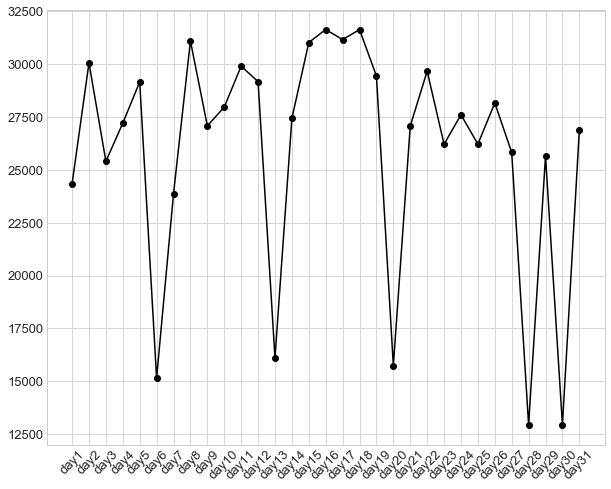

In [141]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.plot(x_axis, predicted, '-ok', color='black')

In [142]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '17-05-2016') & (combined['pool_window'] == 10)]
B1 = combined.loc[(combined['DateRunFor'] == '28-05-2016') & (combined['pool_window'] == 10)]
C1 = combined.loc[(combined['DateRunFor'] == '24-05-2016') & (combined['pool_window'] == 10)]

print(A1['dist_saved'].sum())
print(B1['dist_saved'].sum())
print(C1['dist_saved'].sum())
train_x = np.array([dict[17],dict[28],dict[24]])
train_y = np.array([A1['dist_saved'].sum(),B1['dist_saved'].sum(),C1['dist_saved'].sum()])
test_x = []
for i in dict.items():
    if i[0]!= 6 and i[0]!=18 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

33315.5291
14151.11394
27778.31558
28


In [143]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[3.54553949]


In [144]:
predicted2 = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted2)

[25838.03463116 31705.90248684 26933.60633352 28784.37794722
 30784.06221948 16424.62728566 25359.38680004 32769.56433379
 28653.19298609 29564.39663498 31549.89874929 30798.24437744
 17399.65064536 29014.83801406 32695.1080045  33326.21403369
 32836.9295841  31071.25091816 17023.82345944 28646.10190711
 31308.80206398 27763.26257414 29192.11498855 29762.94684641
 27366.16215128 14155.48201216 27185.3396373  28440.4606167 ]


In [145]:
predicted2= list(predicted2)
predicted2.insert(17,A1['dist_saved'].sum()) 
predicted2.insert(28,B1['dist_saved'].sum()) 
predicted2.insert(24,C1['dist_saved'].sum())
may_10_min_sum = sum(predicted2)
may_10_min_avg = may_10_min_sum/(len(predicted2))

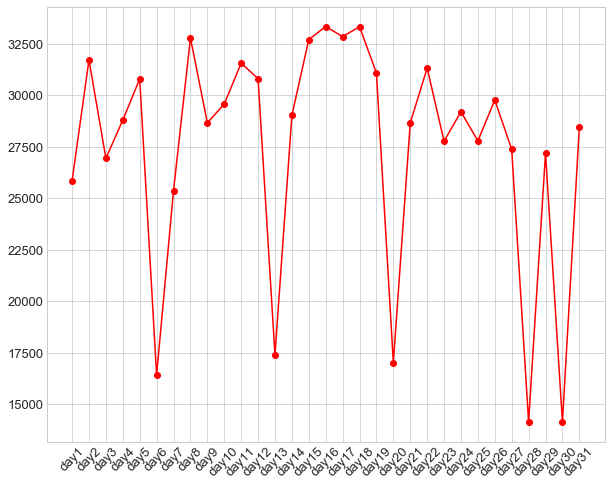

In [146]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.plot(x_axis, predicted2, '-ok', color='red')

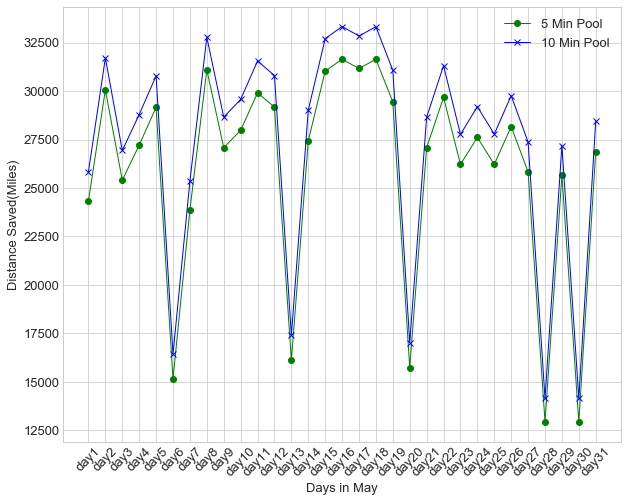

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': x_axis, '5 Min Pool': predicted, '10 Min Pool': predicted2})

# multiple line plot
matplotlib.rcParams.update({'font.size': 13})
fig = plt.figure(figsize=(10,8))
plt.plot( 'x', '5 Min Pool', data=df, marker='o', color='green', linewidth=1)
plt.plot( 'x', '10 Min Pool', data=df, marker='x', color='blue', linewidth=1)
plt.xlabel("Days in May")
plt.ylabel("Distance Saved(Miles)")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Days_may.png')

In [148]:
for i in range(len(predicted)):
    print(predicted2[i],predicted[i],(predicted2[i]-predicted[i])/predicted[i]*100)

25838.034631164446 24336.04079469401 6.1718906914304466
31705.90248683867 30058.90280134365 5.479240863779621
26933.606333522956 25404.538897446117 6.018874982338506
28784.377947215973 27209.57452733803 5.787681164568392
30784.062219481995 29159.842909060324 5.570055077069727
16424.62728565686 15155.256125416185 8.375781641274095
25359.386800036944 23869.221235239205 6.243042243027771
32769.56433378868 31096.279600132108 5.380980474749343
28653.19298609214 27081.631388820788 5.803053644397836
29564.396634979315 27970.317513116228 5.699181359366299
31549.898749285996 29906.75420418801 5.494225598269323
30798.244377441326 29173.674599710837 5.568615541309256
17399.65064536104 16106.184857638935 8.030863914421243
29014.83801405514 27434.33950040886 5.76102265419121
32695.108004502174 31023.66322421691 5.387644805854332
33326.214033692515 31639.17345816473 5.3321259411485435
32836.92958409551 31161.980130722044 5.374977605232994
33315.5291 31636.75006 5.306420655775796
31071.250918158497 2

In [149]:
print(june_5_min_sum,june_5_min_avg)
print(june_10_min_sum,june_10_min_avg)
print(may_5_min_sum,may_5_min_avg)
print(may_10_min_sum,may_10_min_avg)

745696.1360047851 24856.53786682617
795431.545406576 26514.384846885867
803786.0264898569 25928.581499672804
851598.7408624488 27470.927124595124


In [150]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(june),len(may)]
y_train = [june_5_min_avg,may_5_min_avg]
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_5_min_avg = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_5_min_avg=list(predicted_5_min_avg)
predicted_5_min_avg.append(y_train[0])
predicted_5_min_avg.append(y_train[1])
print(predicted_5_min_avg)

[0.06629831]
[22929.2460667735, 23095.190730534483, 25454.946390640253, 24517.22312886024, 24856.53786682617, 25928.581499672804]


In [151]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(june),len(may)]
y_train = [june_10_min_avg,may_10_min_avg]
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_10_min_avg = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_10_min_avg=list(predicted_10_min_avg)
predicted_10_min_avg.append(y_train[0])
predicted_10_min_avg.append(y_train[1])
print(predicted_10_min_avg)
x_axis = ['jan','feb','mar','apr','may','june']

[0.05915537]
[24794.738340206328, 24942.8042227732, 27048.32118569871, 26211.6276806944, 26514.384846885867, 27470.927124595124]


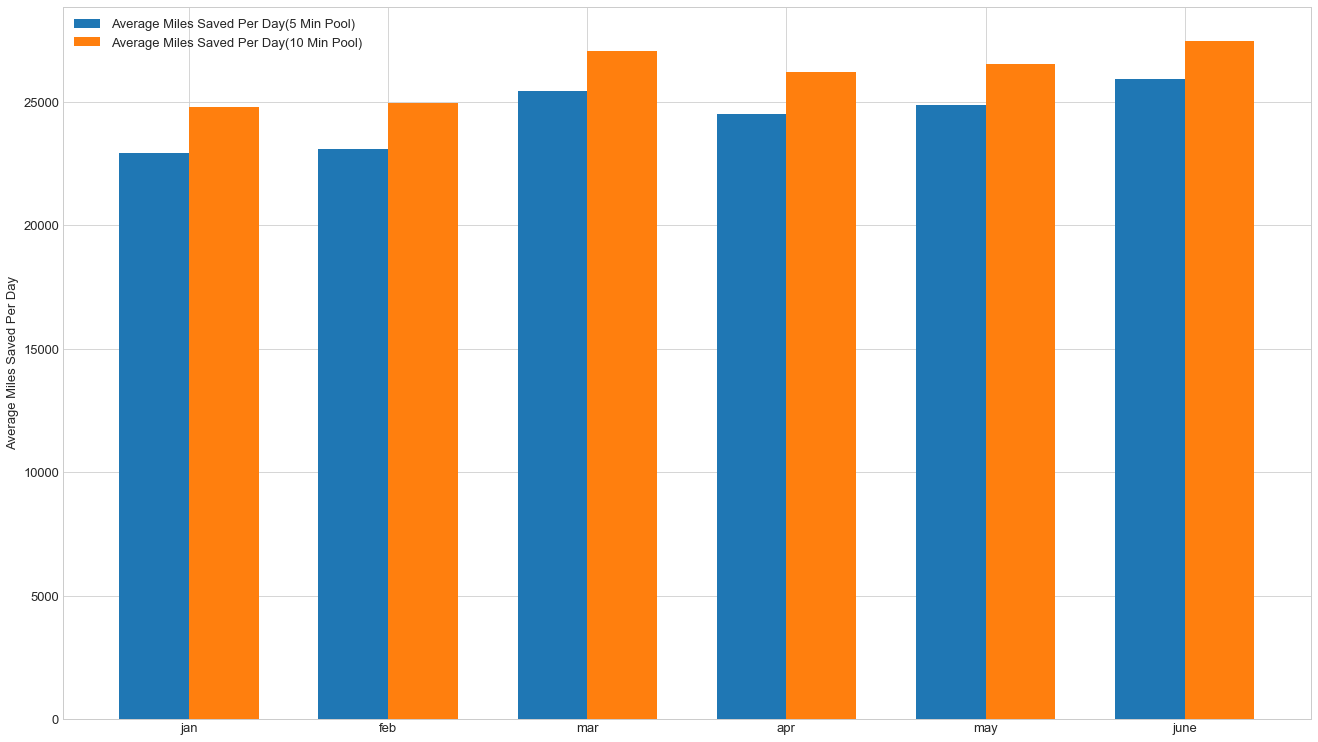

In [152]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = x_axis
bar1 = predicted_5_min_avg
bar2 = predicted_10_min_avg

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
matplotlib.rcParams.update({'font.size': 13})
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
rects1 = ax.bar(x - width/2, bar1, width, label='Average Miles Saved Per Day(5 Min Pool)')
rects2 = ax.bar(x + width/2, bar2, width, label='Average Miles Saved Per Day(10 Min Pool)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Miles Saved Per Day')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


'''autolabel(rects1)
autolabel(rects2)'''

fig.tight_layout()
plt.savefig('Average_Per_days.png')
plt.show()


In [153]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(june),len(may)]
y_train = [june_5_min_sum,may_5_min_sum]
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_5_min_sum = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_5_min_sum=list(predicted_5_min_sum)
predicted_5_min_sum.append(y_train[0])
predicted_5_min_sum.append(y_train[1])
print(predicted_5_min_sum)

[3.59244839]
[641263.6612737377, 650255.5595968134, 778121.5751834033, 727309.9851388236, 745696.1360047851, 803786.0264898569]


In [154]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(june),len(may)]
y_train = [june_10_min_sum,may_10_min_sum]
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_10_min_sum = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_10_min_sum=list(predicted_10_min_sum)
predicted_10_min_sum.append(y_train[0])
predicted_10_min_sum.append(y_train[1])
print(predicted_10_min_sum)

[3.47354332]
[694455.6411454616, 703149.9200710057, 826783.7473969724, 777653.9507038452, 795431.545406576, 851598.7408624488]


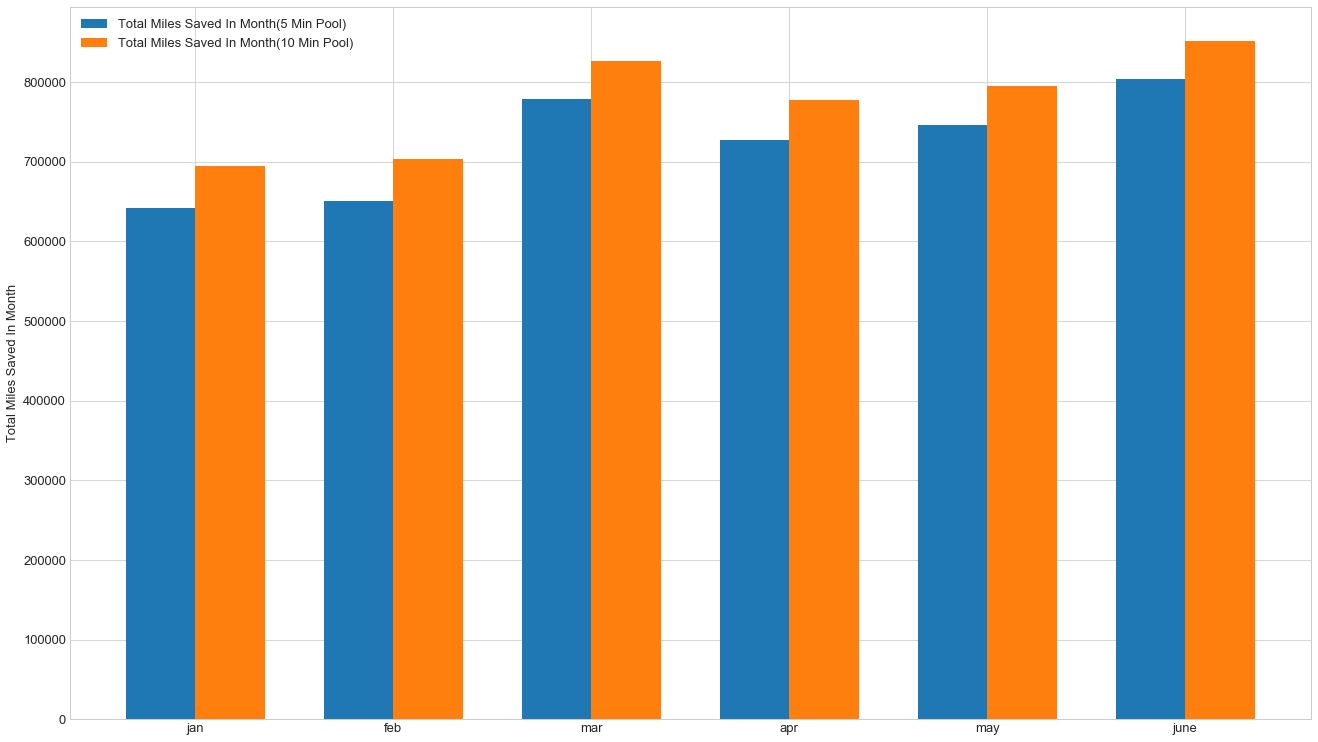

In [155]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = x_axis
bar1 = predicted_5_min_sum
bar2 = predicted_10_min_sum

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
matplotlib.rcParams.update({'font.size': 13})
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
rects1 = ax.bar(x - width/2, bar1, width, label='Total Miles Saved In Month(5 Min Pool)')
rects2 = ax.bar(x + width/2, bar2, width, label='Total Miles Saved In Month(10 Min Pool)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Miles Saved In Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


'''autolabel(rects1)
autolabel(rects2)
'''
fig.tight_layout()
plt.show()


In [156]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '17-05-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='To LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '28-05-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='To LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '24-05-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='To LaGuardia')]
print(A1.columns)
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
may_a_5_to = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
may_b_5_to = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
may_c_5_to = s/c * 100
print(may_a_5_to,may_b_5_to,may_c_5_to)

Index(['pool_id', 'count_of_rides', 'time_taken', 'dist_saved', 'rideLabel',
       'pool_window', 'record_entry', 'trips_saved', 'final_trips',
       'unshared_trips', 'initial_trips_distance', 'initial_trips',
       'DateRunFor'],
      dtype='object')
47.47603833865814 45.30456852791878 47.18498659517426


In [157]:
df = pd.read_csv('2016 Data/may.csv')
day = '01'
s = 0
dict = {}
for i in range (1,32):
    if i <10 :
        day = str(0)+str(i)
    else:
        day = str(i)
    value = len(df.loc[(df['tpep_pickup_datetime']>=day+'-05-2016 00:00') & (df['tpep_pickup_datetime']<=day+'-05-2016 24:00')])
    print(value)
    dict[i] =value
    s+=value
print(s)

7947
9602
8256
8778
9342
9115
5292
7812
9902
8741
8998
9558
9346
5567
8843
9881
10059
9895
9921
9423
5461
8739
9490
8490
8893
9054
8378
4652
5623
8327
8681
262066


In [158]:
train_x = np.array([dict[17],dict[28],dict[24]])
train_y = np.array([may_a_5_to,may_b_5_to,may_c_5_to])
test_x = []
for i in dict.items():
    if i[0]!= 17 and i[0]!=28 and i[0]!=24:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

28


In [159]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[0.00041817]


In [160]:
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)

[46.74440829 47.43648641 46.87362409 47.09191096 47.32776115 47.23283563
 45.63415608 46.68795479 47.56193864 47.07643852 47.18390926 47.41808675
 47.32943385 45.74915396 47.11909228 47.55315698 47.55901142 47.56988395
 47.36163325 45.7048275  47.07560217 47.38965092 47.14000098 47.20732701
 46.92464133 45.77257171 46.90331445 47.05134808]


In [161]:
predicted= list(predicted)
predicted.insert(17,may_a_5_to) 
predicted.insert(28,may_b_5_to) 
predicted.insert(24,may_c_5_to)
avg_save_5_may = predicted

In [162]:
x_axis = []
for i in range(1,32):
    x_axis.append(i)

print(len(predicted))

31


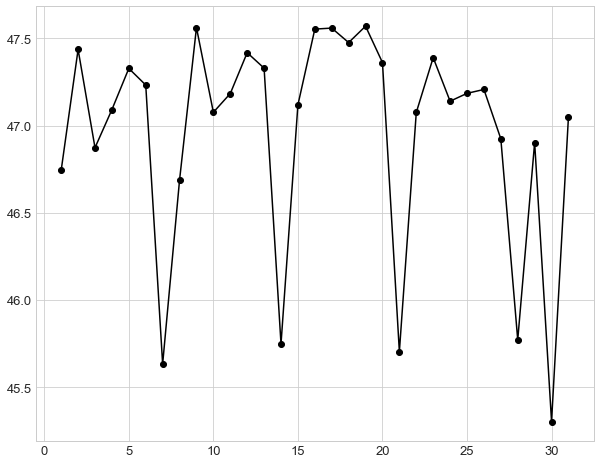

In [163]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
plt.plot(x_axis, predicted, '-ok', color='black')

In [164]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '17-05-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='To LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '28-05-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='To LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '24-05-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='To LaGuardia')]
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
may_a_10_to = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
may_b_10_to = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
may_c_10_to = s/c * 100
print(may_a_10_to,may_b_10_to,may_c_10_to)

48.56230031948882 47.08121827411168 48.41057066258139


In [165]:
df = pd.read_csv('2016 Data/may.csv')
day = '01'
s = 0
dict = {}
for i in range (1,32):
    if i <10 :
        day = str(0)+str(i)
    else:
        day = str(i)
    value = len(df.loc[(df['tpep_pickup_datetime']>=day+'-05-2016 00:00') & (df['tpep_pickup_datetime']<=day+'-05-2016 24:00')])
    print(value)
    dict[i] =value
    s+=value
print(s)

7947
9602
8256
8778
9342
9115
5292
7812
9902
8741
8998
9558
9346
5567
8843
9881
10059
9895
9921
9423
5461
8739
9490
8490
8893
9054
8378
4652
5623
8327
8681
262066


In [166]:
train_x = np.array([dict[17],dict[28],dict[24]])
train_y = np.array([may_a_10_to,may_b_10_to,may_c_10_to])
test_x = []
for i in dict.items():
    if i[0]!= 17 and i[0]!=28 and i[0]!=24:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

28


In [167]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[0.00028751]


In [168]:
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)

[48.07936482 48.55519081 48.16820484 48.3182841  48.48043869 48.41517434
 47.31603069 48.04055122 48.64144326 48.3076463  48.38153589 48.54254045
 48.48158873 47.39509543 48.33697213 48.63540559 48.6394307  48.64690591
 48.50372685 47.36461956 48.30707128 48.5229899  48.35134753 48.39763635
 48.20328084 47.41119588 48.18861792 48.29039581]


In [169]:
predicted= list(predicted)
predicted.insert(17,may_a_10_to) 
predicted.insert(28,may_b_10_to) 
predicted.insert(24,may_c_10_to)
avg_save_10_may = predicted

In [170]:
x_axis = []
for i in range(1,32):
     x_axis.append('day'+str(i))

print(len(predicted))

31


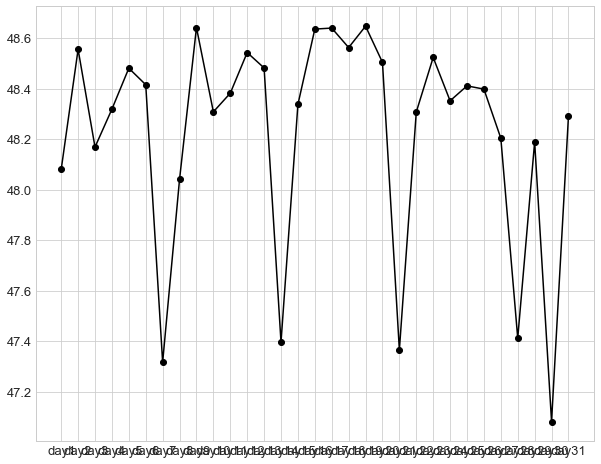

In [171]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
plt.plot(x_axis, predicted, '-ok', color='black')

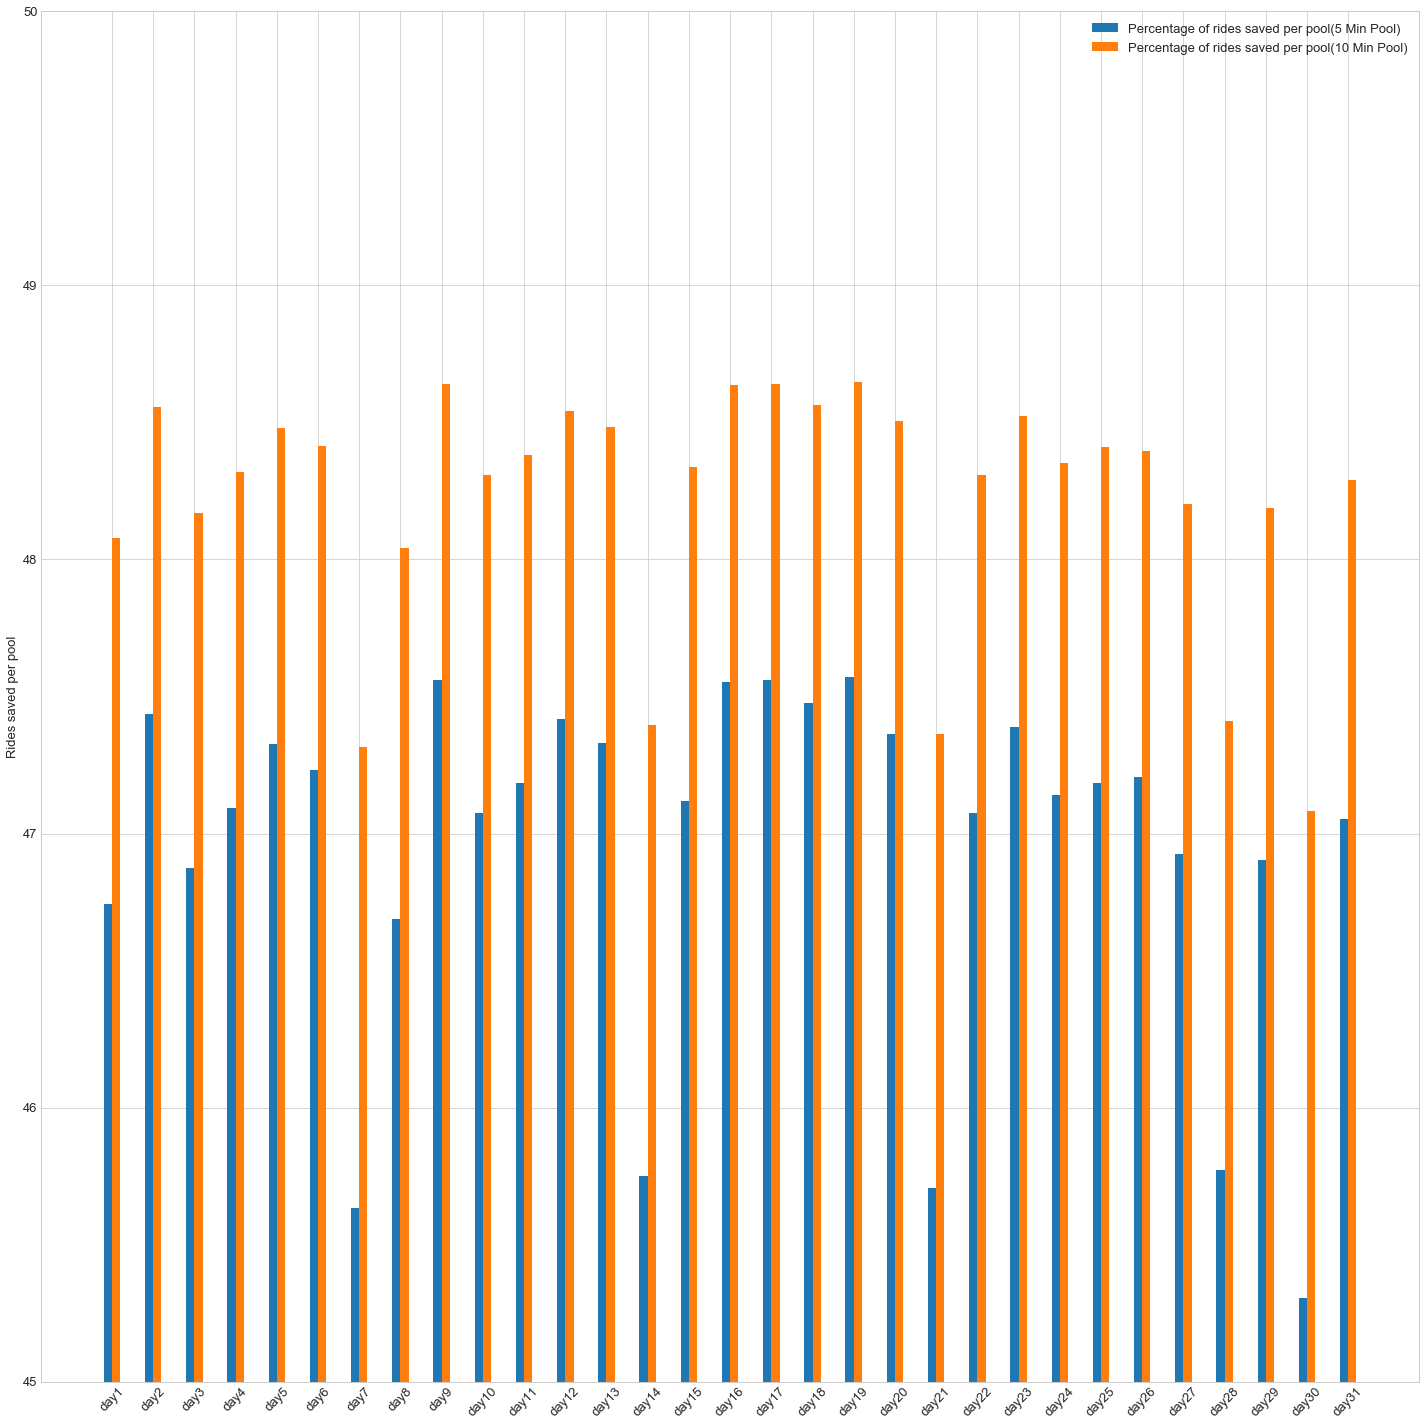

In [172]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = x_axis
bar1 = avg_save_5_may
bar2 = avg_save_10_may

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
rects1 = ax.bar(x - width/2, bar1, width, label='Percentage of rides saved per pool(5 Min Pool)')
rects2 = ax.bar(x + width/2, bar2, width, label='Percentage of rides saved per pool(10 Min Pool)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rides saved per pool')
ax.set_xticks(x)
ymin= 45
ymax= 50
ax.set_ylim([ymin,ymax])
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()
plt.show()

In [173]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '17-05-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='From LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '28-05-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='From LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '24-05-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='From LaGuardia')]
print(A1.columns)
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
may_a_5_from = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
may_b_5_from = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
may_c_5_from = s/c * 100
print(may_a_5_from,may_b_5_from,may_c_5_from)

Index(['pool_id', 'count_of_rides', 'time_taken', 'dist_saved', 'rideLabel',
       'pool_window', 'record_entry', 'trips_saved', 'final_trips',
       'unshared_trips', 'initial_trips_distance', 'initial_trips',
       'DateRunFor'],
      dtype='object')
48.62597628001157 47.100977198697066 48.41459256733721


In [174]:
train_x = np.array([dict[17],dict[28],dict[24]])
train_y = np.array([may_a_5_from,may_b_5_from,may_c_5_from])
test_x = []
for i in dict.items():
    if i[0]!= 17 and i[0]!=28 and i[0]!=24:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

28


In [175]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[0.00029334]


In [176]:
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)

[48.10976075 48.59523484 48.20040214 48.35352448 48.51896701 48.45237933
 47.33094884 48.07016014 48.68323619 48.34267098 48.4180588  48.58232798
 48.52014036 47.41161674 48.37259144 48.6770761  48.68118283 48.68880961
 48.54272737 47.38052293 48.3420843  48.56238101 48.38725833 48.43448572
 48.23618935 47.42804365 48.22122912 48.32507071]


In [177]:
predicted= list(predicted)
predicted.insert(17,may_a_5_from) 
predicted.insert(28,may_b_5_from) 
predicted.insert(24,may_c_5_from)
avg_save_5_may_from = predicted

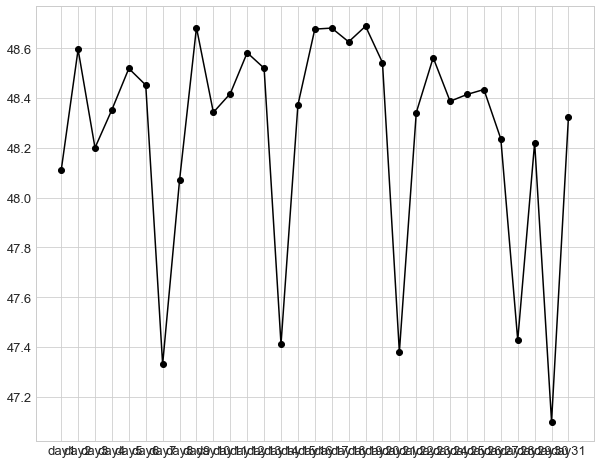

In [178]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
plt.plot(x_axis, predicted, '-ok', color='black')

In [179]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '17-05-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='From LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '28-05-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='From LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '24-05-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='From LaGuardia')]
print(A1.columns)
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
may_a_10_from = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
may_b_10_from = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
may_c_10_from = s/c * 100
print(may_a_10_from,may_b_10_from,may_c_10_from)

Index(['pool_id', 'count_of_rides', 'time_taken', 'dist_saved', 'rideLabel',
       'pool_window', 'record_entry', 'trips_saved', 'final_trips',
       'unshared_trips', 'initial_trips_distance', 'initial_trips',
       'DateRunFor'],
      dtype='object')
49.34914665895285 48.43648208469055 49.21581997954313


In [180]:
train_x = np.array([dict[17],dict[28],dict[24]])
train_y = np.array([may_a_10_from,may_b_10_from,may_c_10_from])
test_x = []
for i in dict.items():
    if i[0]!= 17 and i[0]!=28 and i[0]!=24:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))

28


In [181]:
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)

[0.00017522]


In [182]:
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)

[49.03786323 49.32785277 49.09200629 49.18347127 49.2822955  49.2425205
 48.57265343 49.0142085  49.38041885 49.17698812 49.22201973 49.32014307
 49.28299638 48.620839   49.19486059 49.37673922 49.3791923  49.38374803
 49.29648834 48.60226566 49.17663768 49.3082281  49.2036216  49.23183206
 49.11338316 48.63065134 49.10444693 49.1664749 ]


In [183]:
predicted= list(predicted)
predicted.insert(17,may_a_10_from) 
predicted.insert(28,may_b_10_from) 
predicted.insert(24,may_c_10_from)
avg_save_10_may_from = predicted

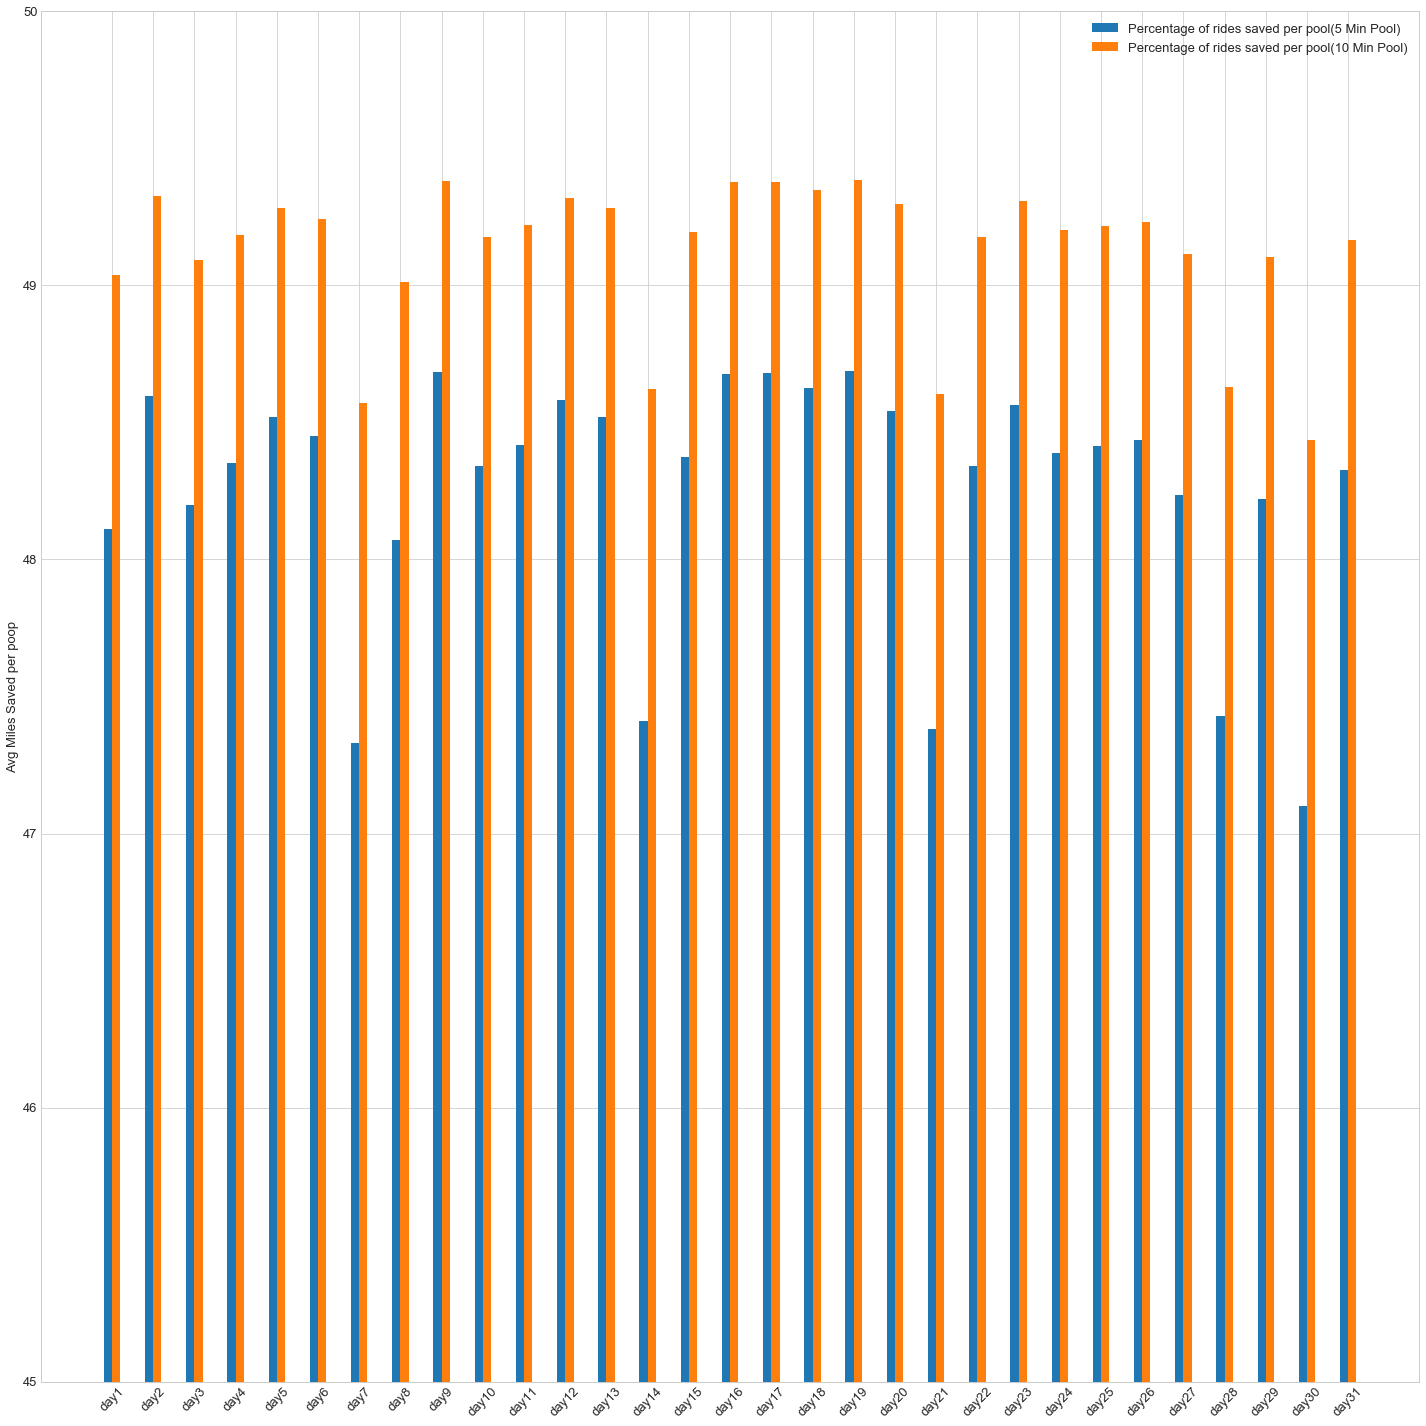

In [184]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = x_axis
bar1 = avg_save_5_may_from
bar2 = avg_save_10_may_from

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
rects1 = ax.bar(x - width/2, bar1, width, label='Percentage of rides saved per pool(5 Min Pool)')
rects2 = ax.bar(x + width/2, bar2, width, label='Percentage of rides saved per pool(10 Min Pool)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg Miles Saved per poop')
ax.set_xticks(x)
ymin= 45
ymax= 50
ax.set_ylim([ymin,ymax])
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()
plt.show()

In [185]:
print(sum(avg_save_10_may_from)/31)

49.126654685852245


In [186]:
print(sum(avg_save_5_may_from)/31)

48.25840732572447


In [187]:
print(sum(avg_save_10_may)/31)

48.225057260577024


In [188]:
print(sum(avg_save_5_may)/31)

46.95631464134972


In [189]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '18-06-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='To LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '06-06-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='To LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '29-06-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='To LaGuardia')]
print(A1.columns)
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
june_a_5_to = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
june_b_5_to = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
june_c_5_to = s/c * 100
print(june_a_5_to,june_b_5_to,june_c_5_to)

Index(['pool_id', 'count_of_rides', 'time_taken', 'dist_saved', 'rideLabel',
       'pool_window', 'record_entry', 'trips_saved', 'final_trips',
       'unshared_trips', 'initial_trips_distance', 'initial_trips',
       'DateRunFor'],
      dtype='object')
45.70312499999999 47.18453188602442 47.23618090452262


In [190]:
df = pd.read_csv('2016 Data/june.csv')
day = '01'
s = 0
dict = {}
for i in range (1,31):
    if i <10 :
        day = str(0)+str(i)
    else:
        day = str(i)
    value = len(df.loc[(df['tpep_pickup_datetime']>=day+'-06-2016 00:00') & (df['tpep_pickup_datetime']<=day+'-06-2016 24:00')])
    print(value)
    dict[i] =value
    s+=value
print(s)

8601
8708
8537
4981
7757
10239
8354
8410
9460
9260
5106
7960
9436
8770
8766
8840
9289
4821
7841
9039
7553
8463
8647
9155
5320
8124
9623
7604
8843
8389
245896


In [191]:
train_x = np.array([dict[18],dict[6],dict[29]])
train_y = np.array([june_a_5_to,june_b_5_to,june_c_5_to])
test_x = []
for i in dict.items():
    if i[0]!= 18 and i[0]!=6 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)
predicted= list(predicted)
predicted.insert(16,june_a_5_to) 
predicted.insert(6,june_b_5_to) 
predicted.insert(29,june_c_5_to)
avg_save_5_june = predicted
print(sum(avg_save_5_june)/30)

27
[0.00029739]
[46.89629329 46.92811408 46.87726029 45.81973943 46.64529565 46.82283782
 46.83949169 47.15175179 47.09227367 45.85691325 46.70566594 47.14461441
 46.9465523  46.94536273 46.96736964 47.100898   46.67027646 47.02655036
 46.58462797 46.85525339 46.90997326 47.06104767 45.92055484 46.75443799
 47.20022645 46.59979489 46.83324649]
46.77600871827807


In [192]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '18-06-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='To LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '06-06-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='To LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '29-06-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='To LaGuardia')]
print(A1.columns)
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
june_a_10_to = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
june_b_10_to = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
june_c_10_to = s/c * 100
print(june_a_10_to,june_b_10_to,june_c_10_to)
train_x = np.array([dict[18],dict[6],dict[29]])
train_y = np.array([june_a_10_to,june_b_10_to,june_c_10_to])
test_x = []
for i in dict.items():
    if i[0]!= 18 and i[0]!=6 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)
predicted= list(predicted)
predicted.insert(16,june_a_10_to) 
predicted.insert(6,june_b_10_to) 
predicted.insert(29,june_c_10_to)
avg_save_10_june = predicted

Index(['pool_id', 'count_of_rides', 'time_taken', 'dist_saved', 'rideLabel',
       'pool_window', 'record_entry', 'trips_saved', 'final_trips',
       'unshared_trips', 'initial_trips_distance', 'initial_trips',
       'DateRunFor'],
      dtype='object')
47.71205357142857 48.405698778833106 48.40871021775544
27
[0.00013808]
[48.26293655 48.27771083 48.2540996  47.76309632 48.14639921 48.22883143
 48.23656376 48.38154505 48.35392956 47.780356   48.17442893 48.37823119
 48.28627163 48.28571932 48.29593705 48.35793381 48.15799772 48.32341446
 48.11823142 48.24388187 48.26928811 48.33943144 47.80990456 48.19707362
 48.40405166 48.12527337 48.23366414]


In [193]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '18-06-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='From LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '06-06-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='From LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '29-06-2016') & (combined['pool_window'] == 10) & (combined['rideLabel']=='From LaGuardia')]
print(A1.columns)
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
june_a_10_from = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
june_b_10_from = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
june_c_10_from = s/c * 100
print(june_a_10_from,june_b_10_from,june_c_10_from)
train_x = np.array([dict[18],dict[6],dict[29]])
train_y = np.array([june_a_10_from,june_b_10_from,june_c_10_from])
test_x = []
for i in dict.items():
    if i[0]!= 18 and i[0]!=6 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)
predicted= list(predicted)
predicted.insert(16,june_a_10_from) 
predicted.insert(6,june_b_10_from) 
predicted.insert(29,june_c_10_from)
avg_save_10_june_from = predicted

Index(['pool_id', 'count_of_rides', 'time_taken', 'dist_saved', 'rideLabel',
       'pool_window', 'record_entry', 'trips_saved', 'final_trips',
       'unshared_trips', 'initial_trips_distance', 'initial_trips',
       'DateRunFor'],
      dtype='object')
48.213103904698876 49.31977463240346 49.00582790538225
27
[0.00020267]
[48.97459009 48.99627527 48.96161952 48.24094215 48.80354068 48.92453179
 48.93588105 49.14867948 49.10814645 48.26627529 48.84468171 49.14381552
 49.00884051 49.00802985 49.02302707 49.11402374 48.82056456 49.06335744
 48.76219699 48.9466223  48.98391269 49.0868666  48.30964564 48.8779188
 49.18171391 48.77253291 48.93162508]


In [194]:
combined = pd.read_csv('Preprocessing/c.csv')
#print(combined.columns)
A1 = combined.loc[(combined['DateRunFor'] == '18-06-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='From LaGuardia')]
B1 = combined.loc[(combined['DateRunFor'] == '06-06-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='From LaGuardia')]
C1 = combined.loc[(combined['DateRunFor'] == '29-06-2016') & (combined['pool_window'] == 5) & (combined['rideLabel']=='From LaGuardia')]
print(A1.columns)
s= A1['trips_saved'].mean()
c= A1['initial_trips'].mean()
june_a_5_from = s/c * 100
s=B1['trips_saved'].mean()
c=B1['initial_trips'].mean()
june_b_5_from = s/c * 100
s=C1['trips_saved'].mean()
c=C1['initial_trips'].mean()
june_c_5_from = s/c * 100
print(june_a_5_from,june_b_5_from,june_c_5_from)
train_x = np.array([dict[18],dict[6],dict[29]])
train_y = np.array([june_a_5_from,june_b_5_from,june_c_5_from])
test_x = []
for i in dict.items():
    if i[0]!= 18 and i[0]!=6 and i[0]!=29:
        test_x.append(i[1])
test_x=np.array(test_x)
print(len(test_x))
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(train_x).reshape(-1,1),train_y)
print(fitted_model.coef_)
predicted = fitted_model.predict(np.array(test_x).reshape(-1,1))
print(predicted)
predicted= list(predicted)
predicted.insert(16,june_a_5_from) 
predicted.insert(6,june_b_5_from) 
predicted.insert(29,june_c_5_from)
avg_save_5_june_from = predicted

Index(['pool_id', 'count_of_rides', 'time_taken', 'dist_saved', 'rideLabel',
       'pool_window', 'record_entry', 'trips_saved', 'final_trips',
       'unshared_trips', 'initial_trips_distance', 'initial_trips',
       'DateRunFor'],
      dtype='object')
46.65784248841827 48.42654940222619 48.01165581076448
27
[0.00032871]
[47.90686455 47.94203635 47.88582722 46.71694015 47.62943466 47.82567358
 47.84408125 48.18922507 48.12348339 46.7580287  47.69616247 48.18133607
 47.96241627 47.96110144 47.98542586 48.13301593 47.65704617 48.05083883
 47.56237815 47.86150279 47.92198514 48.08896901 46.82837229 47.75007065
 48.24280454 47.57914228 47.83717837]


In [195]:
print(sum(avg_save_5_june_from)/30)

47.77391296282513


In [196]:
print(sum(avg_save_5_june)/30)

46.77600871827807


In [197]:
print(sum(avg_save_10_june_from)/30)

48.892618784802494


In [198]:
print(sum(avg_save_10_june)/30)

48.207088839510256


In [199]:
x_axis = []
for i in range(1,31):
    x_axis.append('day'+str(i))

print(len(predicted))

30


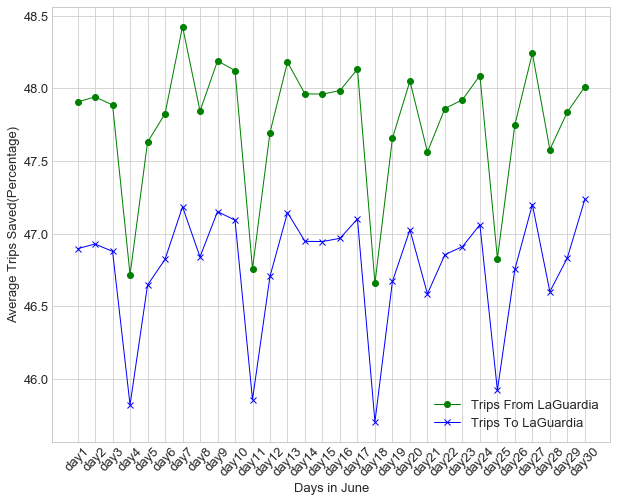

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': x_axis, 'Trips From LaGuardia': avg_save_5_june_from, 'Trips To LaGuardia': avg_save_5_june})
 
# multiple line plot
fig = plt.figure(figsize=(10,8))
plt.plot( 'x', 'Trips From LaGuardia', data=df, marker='o', color='green', linewidth=1)
plt.plot( 'x', 'Trips To LaGuardia', data=df, marker='x', color='blue', linewidth=1)
plt.xlabel("Days in June")
plt.ylabel("Average Trips Saved(Percentage)")
plt.xticks(rotation=45)
plt.legend()

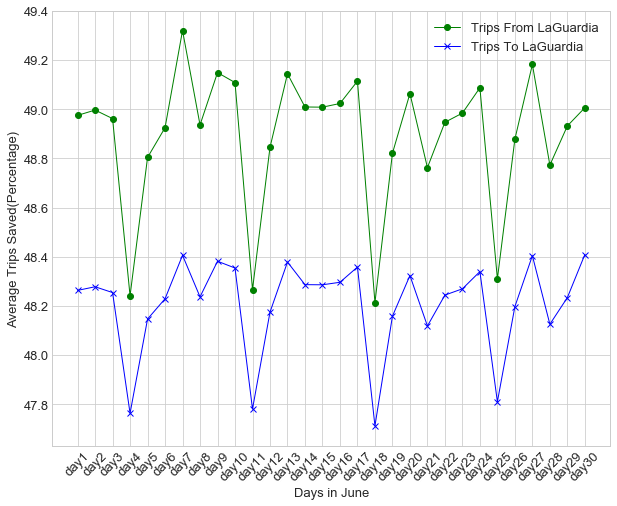

In [201]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': x_axis, 'Trips From LaGuardia': avg_save_10_june_from, 'Trips To LaGuardia': avg_save_10_june})
 
# multiple line plot
fig = plt.figure(figsize=(10,8))
plt.plot( 'x', 'Trips From LaGuardia', data=df, marker='o', color='green', linewidth=1)
plt.plot( 'x', 'Trips To LaGuardia', data=df, marker='x', color='blue', linewidth=1)
plt.xlabel("Days in June")
plt.ylabel("Average Trips Saved(Percentage)")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Avg trips Saved(10min June).png')

In [202]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(may),len(june)]
y_train = [sum(avg_save_5_may)/31,sum(avg_save_5_june)/30]
print(sum(avg_save_5_may)/31)
print(sum(avg_save_5_june)/30)
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_5_to = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_5_to = list(predicted_5_to)
predicted_5_to.append(y_train[0])
predicted_5_to.append(y_train[1])
print(predicted_5_to)
x_axis = ['jan','feb','mar','apr','may','june']

46.95631464134972
46.77600871827807
[1.11506446e-05]
[46.45185947995446, 46.47976954337118, 46.87665443637607, 46.7189397192502, 46.95631464134972, 46.77600871827807]


In [207]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(may),len(june)]
y_train = [sum(avg_save_5_may_from)/31,sum(avg_save_5_june_from)/30]
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_5_from = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_5_from = list(predicted_5_from)
predicted_5_from.append(y_train[0])
predicted_5_from.append(y_train[1])
print(predicted_5_from)
x_axis = ['jan','feb','mar','apr','may','june']

[2.99625456e-05]
[46.90290176124913, 46.97789801297066, 48.044354899716254, 47.62056465427109, 48.25840732572447, 47.77391296282513]


In [208]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(may),len(june)]
y_train = [sum(avg_save_10_may)/31,sum(avg_save_10_june)/30]
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_10_to = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_10_to = list(predicted_10_to)
predicted_10_to.append(y_train[0])
predicted_10_to.append(y_train[1])
print(predicted_10_to)
x_axis = ['jan','feb','mar','apr','may','june']

[1.11121961e-06]
[48.17478568549597, 48.177567068175634, 48.21711870769508, 48.2014016175548, 48.225057260577024, 48.207088839510256]


In [209]:
june = pd.read_csv('2016 Data/june.csv')
may = pd.read_csv('2016 Data/may.csv')
x_train = [len(may),len(june)]
y_train = [sum(avg_save_10_may_from)/31,sum(avg_save_10_june_from)/30]
jan = pd.read_csv('2016 Data/jan.csv')
feb = pd.read_csv('2016 Data/feb.csv')
mar = pd.read_csv('2016 Data/mar.csv')
apr = pd.read_csv('2016 Data/apr.csv')
x_test = [len(jan),len(feb),len(mar),len(apr)]
model = linear_model.LinearRegression()
fitted_model = model.fit(np.array(x_train).reshape(-1,1),y_train)
print(fitted_model.coef_)
predicted_10_from = fitted_model.predict(np.array(x_test).reshape(-1,1))
predicted_10_from = list(predicted_10_from)
predicted_10_from.append(y_train[0])
predicted_10_from.append(y_train[1])
print(predicted_10_from)
x_axis = ['jan','feb','mar','apr','may','june']

[1.44734633e-05]
[48.47187520759061, 48.50810228615137, 49.02325626426292, 48.818543599794914, 49.126654685852245, 48.892618784802494]


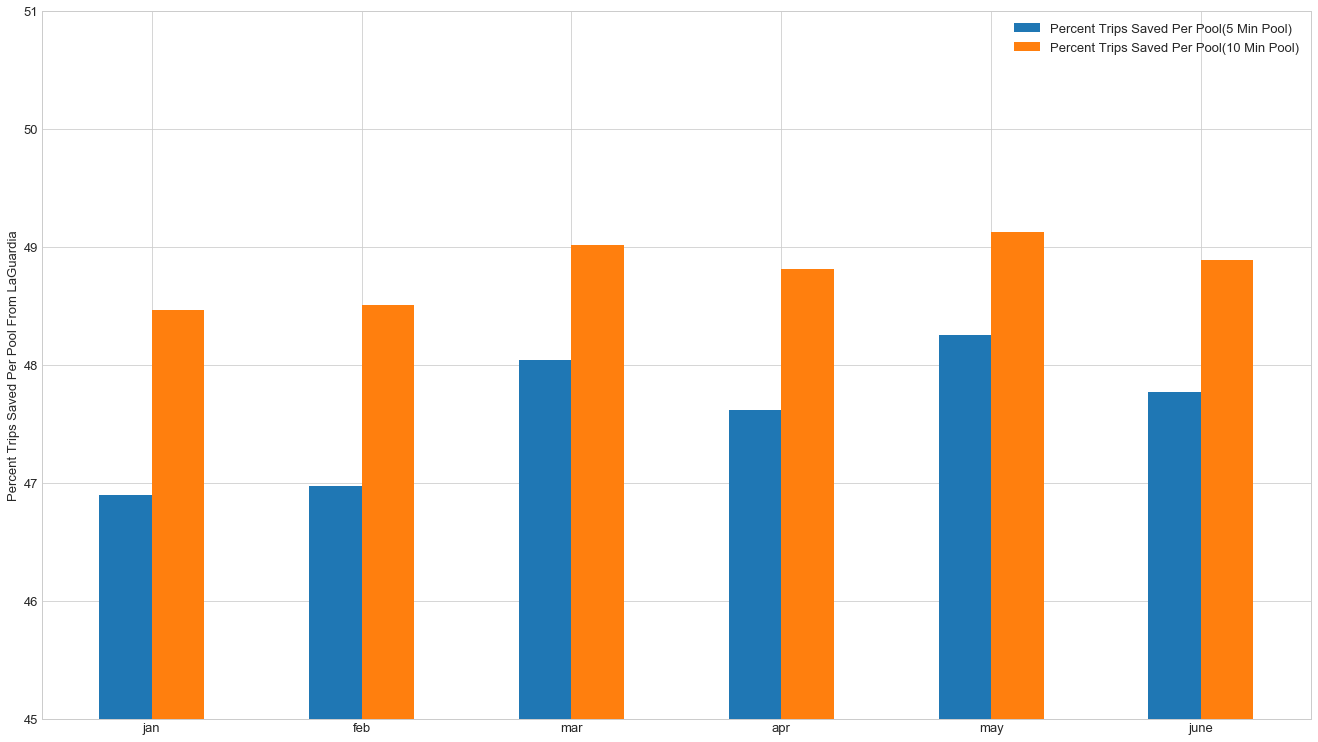

In [210]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = x_axis
bar1 = predicted_5_from
bar2 = predicted_10_from

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
matplotlib.rcParams.update({'font.size': 13})
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
rects1 = ax.bar(x - width/2, bar1, width, label='Percent Trips Saved Per Pool(5 Min Pool)')
rects2 = ax.bar(x + width/2, bar2, width, label='Percent Trips Saved Per Pool(10 Min Pool)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent Trips Saved Per Pool From LaGuardia')
ymin= 45
ymax= 51

ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


'''autolabel(rects1)
autolabel(rects2)'''

fig.tight_layout()
plt.show()

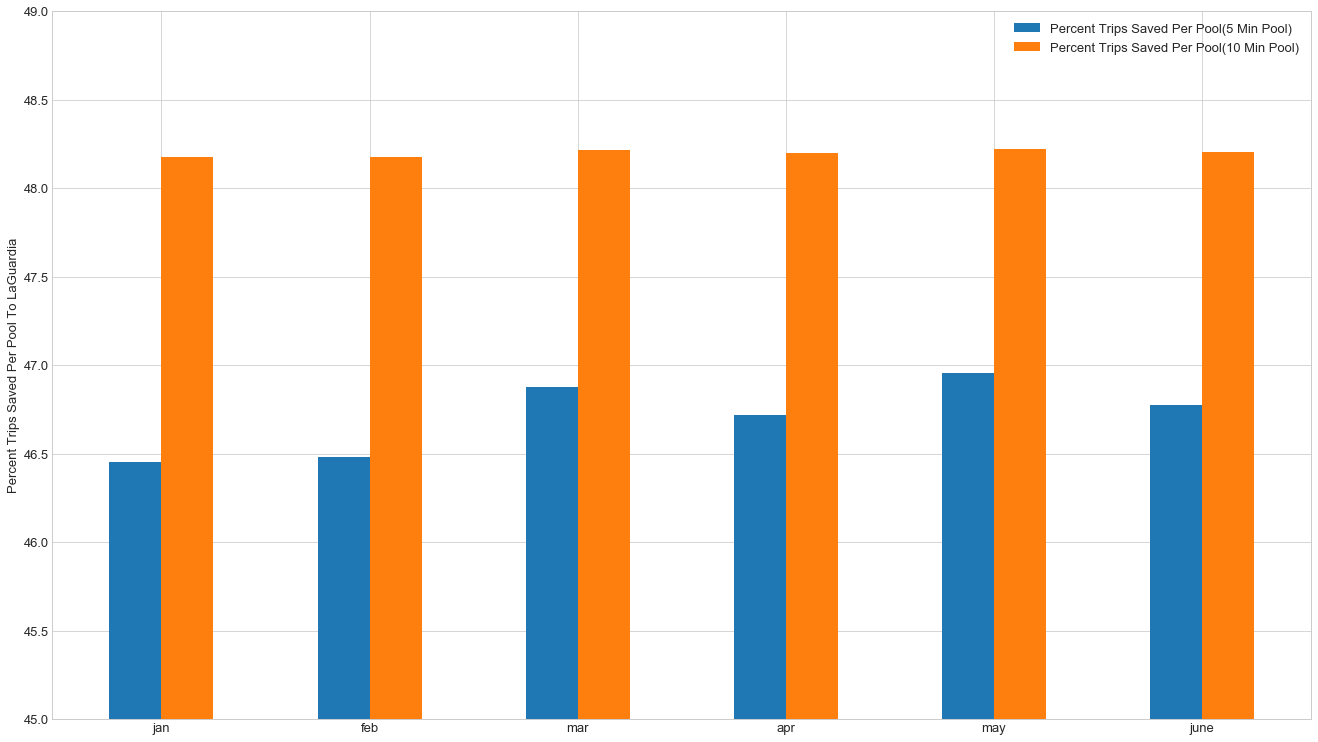

In [211]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = x_axis
bar1 = predicted_5_to
bar2 = predicted_10_to
matplotlib.rcParams.update({'font.size': 13})
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
rects1 = ax.bar(x - width/2, bar1, width, label='Percent Trips Saved Per Pool(5 Min Pool)')
rects2 = ax.bar(x + width/2, bar2, width, label='Percent Trips Saved Per Pool(10 Min Pool)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent Trips Saved Per Pool To LaGuardia')
ymin= 45
ymax= 49
ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


'''autolabel(rects1)
autolabel(rects2)'''

fig.tight_layout()
plt.show()